In [1]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
from sklearn.model_selection import train_test_split
import numpy
import seaborn as sns

In [2]:
Tweet= pandas.read_csv("Tweets.csv")
Tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [17]:
(len(Tweet)-Tweet.count())/len(Tweet)

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.373087
negativereason_confidence       0.281284
airline                         0.000000
airline_sentiment_gold          0.997268
name                            0.000000
negativereason_gold             0.997814
retweet_count                   0.000000
text                            0.000000
tweet_coord                     0.930396
tweet_created                   0.000000
tweet_location                  0.323292
user_timezone                   0.329235
dtype: float64

In [4]:
del Tweet['tweet_coord']
del Tweet['airline_sentiment_gold']
del Tweet['negativereason_gold']

Text(0.5, 1.0, 'Sentiment Count')

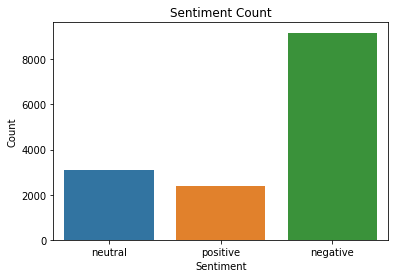

In [18]:
sns.countplot(Tweet['airline_sentiment'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Count')


Text(0.5,1,'Count of Moods')

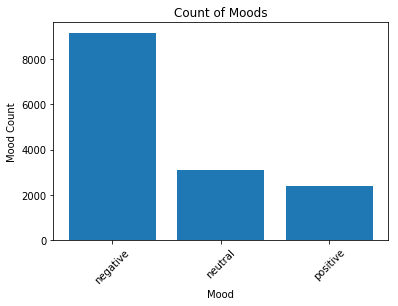

In [19]:
Mood_count=Tweet['airline_sentiment'].value_counts()
Index = [1,2,3]
plt.bar(Index,Mood_count)
plt.xticks(Index,['negative','neutral','positive'],rotation=45)
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')


In [20]:
Tweet['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

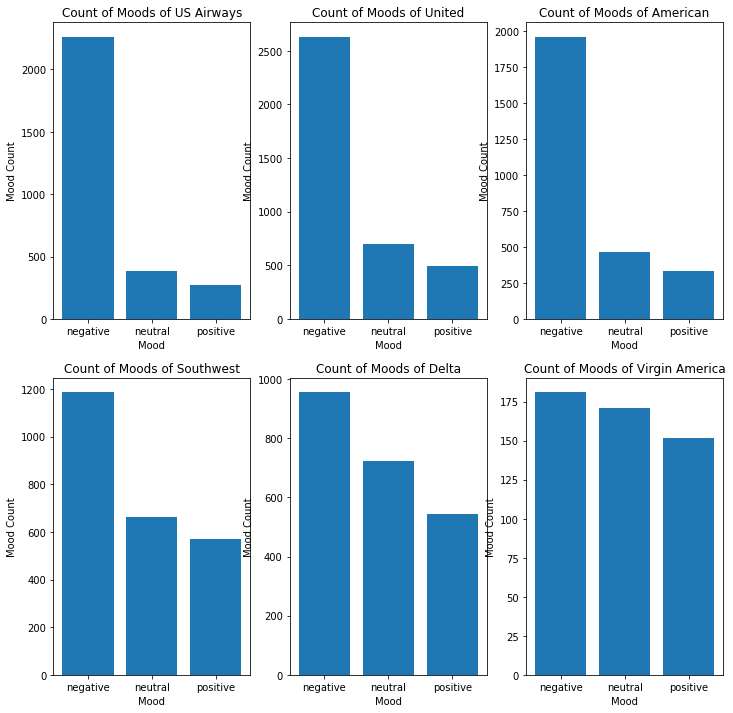

In [21]:
def plot_sub_sentiment(Airline):
    df=Tweet[Tweet['airline']==Airline]
    count=df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count)
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+Airline)
plt.figure(1,figsize=(12, 12))
plt.subplot(231)
plot_sub_sentiment('US Airways')
plt.subplot(232)
plot_sub_sentiment('United')
plt.subplot(233)
plot_sub_sentiment('American')
plt.subplot(234)
plot_sub_sentiment('Southwest')
plt.subplot(235)
plot_sub_sentiment('Delta')
plt.subplot(236)
plot_sub_sentiment('Virgin America')

From the above plots one can find that the distribution of moods for the first three airlines are always skewed toward negative moods. On contrary, the moods are distributed more balanced with the later three airline companies.

In [22]:
NR_Count=dict(Tweet['negativereason'].value_counts(sort=False))

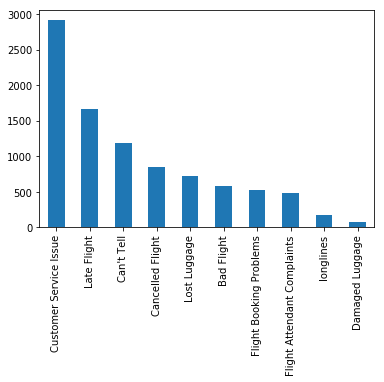

In [51]:
Tweet['negativereason'].value_counts(sort=True).plot(kind="bar")

In [57]:
def plot_reason(Airline):
    if Airline=='All':
        df=Tweet
    else:
        df=Tweet[Tweet['airline']==Airline]
    df['negativereason'].value_counts(sort=True).plot(kind="bar")
    plt.title("Negative reason count")

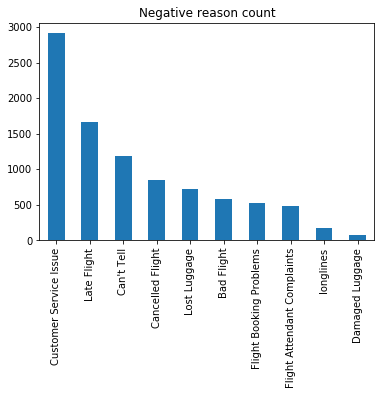

In [58]:
plot_reason('All')

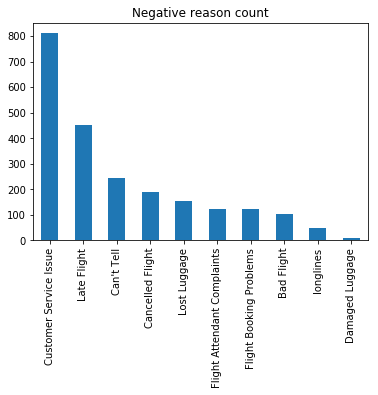

In [59]:
plot_reason('US Airways')

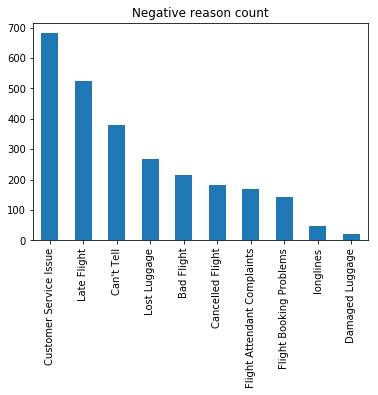

In [60]:
plot_reason('United')

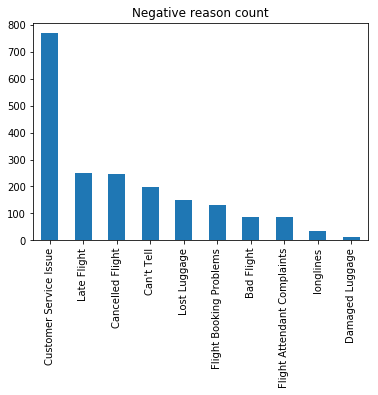

In [61]:
plot_reason('American')

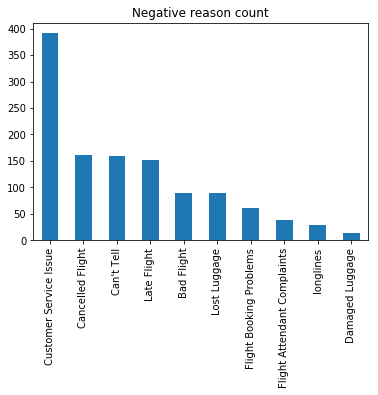

In [62]:
plot_reason('Southwest')

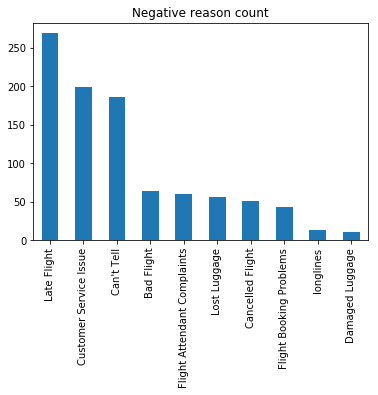

In [63]:
plot_reason('Delta')

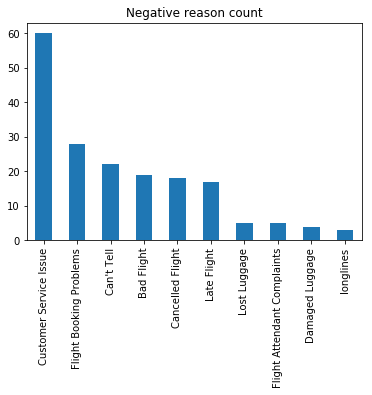

In [64]:
plot_reason('Virgin America')

# Word Cloud for the negative Tweets

In [66]:
# pip install (conda install) wordcloud
from wordcloud import WordCloud, STOPWORDS

In [67]:
df=Tweet[Tweet['airline_sentiment']=='negative']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [68]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

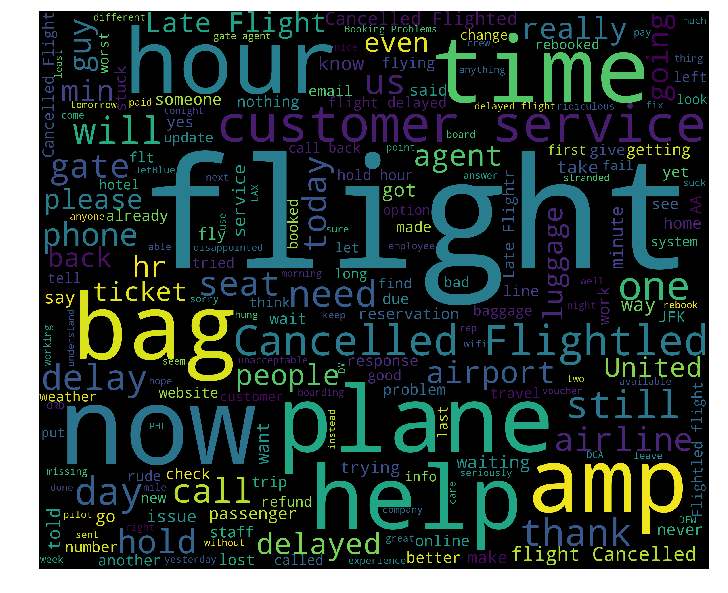

In [69]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

We can find that the Tweets with negative moods are frequently involved some words like cancelled, flight ,customer or hour. People might guess that customer tends to complain when they are waiting for the delayed flights.

Out of curiosity, let's take a look at the good stuff too!

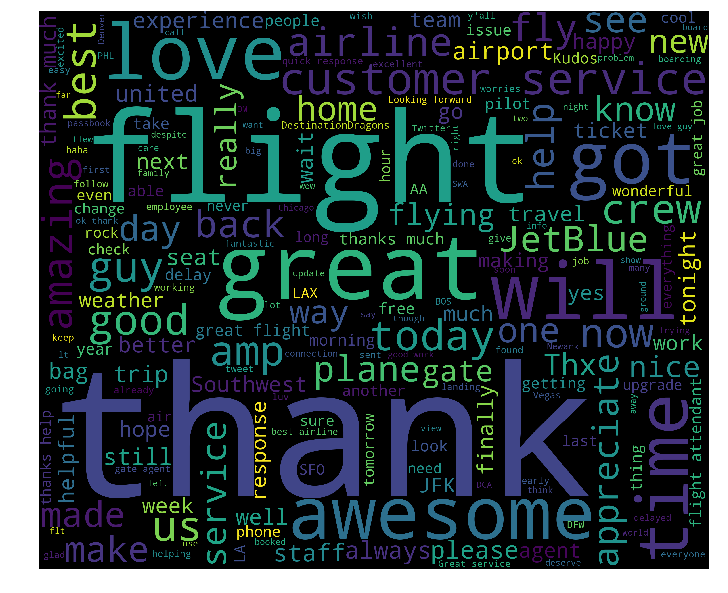

In [70]:
df=Tweet[Tweet['airline_sentiment']=='positive']
words = ' '.join(df['text'])
cleaned_positive_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

positivecloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_positive_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(positivecloud)
plt.axis('off')
plt.show()

# Preprocess data for classification¶

Our data exploration ends up at here. The next step will be preprocess the data in order to make the learning process more smooth.

In [3]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hudsonps/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

In [5]:
Tweet['sentiment']=Tweet['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)

In [6]:
1-Tweet['sentiment'].sum()/ Tweet['sentiment'].count()

0.6269125683060109

In [7]:
Tweet['clean_tweet']=Tweet['text'].apply(lambda x: tweet_to_words(x))
Tweet['Tweet_length']=Tweet['text'].apply(lambda x: clean_tweet_length(x))
train,test = train_test_split(Tweet,test_size=0.2,random_state=42)

In [8]:
train.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment,clean_tweet,Tweet_length
750,570101670882840576,negative,0.6737,Can't Tell,0.6737,United,NaN,kbleggett,NaN,0,@united you are offering us 8 rooms for 32 peo...,NaN,2015-02-23 22:03:24 -0800,"Ottawa, Canada",Eastern Time (US & Canada),0,united offering us rooms people fail,6
6875,570073592848715776,negative,0.6757,Can't Tell,0.3515,Delta,NaN,empiricalco,NaN,0,@JetBlue JFK NYC staff is amazing. The #lax Je...,NaN,2015-02-23 20:11:50 -0800,22nd Century,Pacific Time (US & Canada),0,jetblue jfk nyc staff amazing lax jetblue send...,13
7598,569516908195815425,positive,0.6671,NaN,0.0000,Delta,NaN,djkeating13,NaN,0,"@JetBlue well, the last update was in the righ...",NaN,2015-02-22 07:19:46 -0800,"Malden, MA",Eastern Time (US & Canada),1,jetblue well last update right direction least...,10
14124,569664077049384961,negative,1.0000,Late Flight,1.0000,American,NaN,drguzman,NaN,0,@AmericanAir flight 3056 still sitting at DFW ...,NaN,2015-02-22 17:04:34 -0800,"Springfield, Illinois",Central Time (US & Canada),0,americanair flight still sitting dfw waiting b...,8
6187,568147483269971969,neutral,0.6883,NaN,0.0000,Southwest,NaN,Brian_Fox,NaN,0,@southwestair is your companion pass broken to...,NaN,2015-02-18 12:38:10 -0800,"NH, United States",Eastern Time (US & Canada),1,southwestair companion pass broken today purch...,17


In [9]:
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)


In [11]:
from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import lightgbm as lgb

/usr/local/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [13]:
Classifiers = [
    LogisticRegression(),
    SVC(kernel="linear", probability=True),
    DecisionTreeClassifier()
    #RandomForestClassifier(),
    #lgb.LGBMClassifier()
]

In [14]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+ classifier.__class__.__name__+' is '+str(accuracy))    

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
Accuracy of LogisticRegression is 0.83025956284153
Accuracy of SVC is 0.8090846994535519
Accuracy of DecisionTreeClassifier is 0.7547814207650273


Text(0.5, 1.0, 'Accuracies of Models')

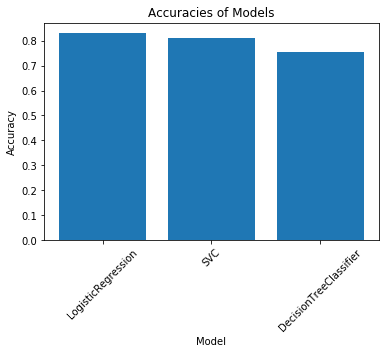

In [16]:
Index = [1,2,3]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model, rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

#### Lets take Logistic Regression and further tune it

In [17]:
from sklearn.model_selection import  StratifiedKFold, cross_val_score
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [23]:
np.random.seed(1)
lr = LogisticRegression()



In [26]:
from sklearn.model_selection import GridSearchCV
grid_lr = GridSearchCV(lr,
                    param_grid = {
                        'C': [0.01, 0.1, 1, 2], 
                        'class_weight':[None,'balanced'],
                        'penalty': ['l2', 'l1']}, 
                    cv = kfolds,
                    scoring="roc_auc",
                    verbose=1,   
                    n_jobs=-1) 

grid_lr.fit(train_features, train['sentiment'])
grid_lr.score(test_features, test['sentiment'])

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    7.0s finished
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8994454495939463

In [27]:
print (grid_lr.best_params_ , grid_lr.best_score_)
def report_results(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    pred = model.predict(X)        

    auc = roc_auc_score(y, pred_proba)
    acc = accuracy_score(y, pred)
    f1 = f1_score(y, pred)
    prec = precision_score(y, pred)
    rec = recall_score(y, pred)
    result = {'auc': auc, 'f1': f1, 'acc': acc, 'precision': prec, 'recall': rec}
    return result 

{'C': 1, 'class_weight': None, 'penalty': 'l2'} 0.8970738721480975


In [29]:
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score

report_results(grid_lr.best_estimator_, test_features, test['sentiment'])

{'auc': 0.8994454495939463,
 'f1': 0.7604819277108433,
 'acc': 0.83025956284153,
 'precision': 0.7615830115830116,
 'recall': 0.7593840230991338}

In [30]:
def get_roc_curve(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, pred_proba)
    return fpr, tpr

In [31]:
roc_svm = get_roc_curve(grid_lr.best_estimator_, test_features, test['sentiment'])

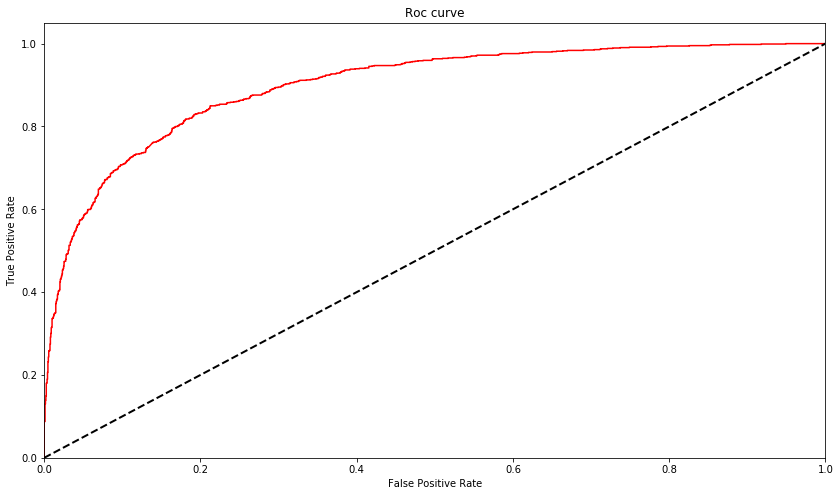

In [243]:
fpr, tpr = roc_svm
plt.figure(figsize=(14,8))
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve')
plt.show()

In [32]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
    learning_curve(grid_lr.best_estimator_, train_features, train['sentiment'], cv=5, n_jobs=-1, 
                   scoring="roc_auc", train_sizes=np.linspace(.1, 1.0, 10), random_state=1)

In [33]:
def plot_learning_curve(X, y, train_sizes, train_scores, test_scores, title='', ylim=None, figsize=(14,8)):

    plt.figure(figsize=figsize)
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="lower right")
    return plt

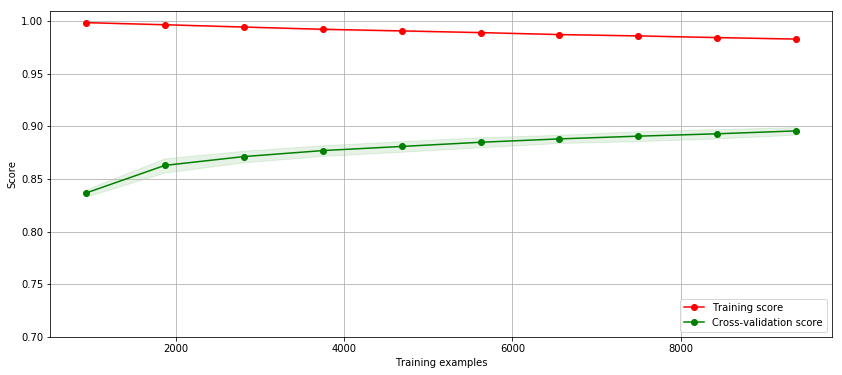

In [34]:
plot_learning_curve(train_features, train['sentiment'], train_sizes, 
                    train_scores, test_scores, ylim=(0.7, 1.01), figsize=(14,6))
plt.show()